<a href="https://colab.research.google.com/github/SIDHARTHMS26/Portugal-Player-Analysis-and-Real-time-strategy-development/blob/main/Portugal_Player_Analysis_and_Real_Time_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/FIFA 24.csv", encoding='latin-1')
data.head(10)

,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Cristian Castro Devenish,Colombia,192,84,22,Atl. Nacional,55,43,NaN,68,...,32,34,41,33,10,11,6,7,9,$1.400.000
1,Silaldo Taffarel,Brazil,181,80,31,Corinthians,69,70,NaN,56,...,65,62,48,46,12,15,14,8,14,$975.00
2,Thomas DÃ¤hne,Germany,193,84,29,Holstein Kiel,25,12,NaN,13,...,20,15,26,16,64,74,65,68,74,$1.100.000
3,Michael Sollbauer,Austria,187,86,33,SK Rapid Wien,46,48,NaN,66,...,25,13,22,19,10,10,8,14,9,$650.00
4,Diego Segovia,Uruguay,191,80,23,Independiente,14,8,NaN,14,...,9,10,16,5,61,59,62,64,64,$300.00
5,ClÃ¡udio Ramos,Portugal,183,83,31,FC Porto,20,16,NaN,13,...,15,13,13,10,72,78,73,64,74,$2.800.000
6,CÃ©dric Zesiger,Switzerland,194,88,25,BSC Young Boys,52,43,NaN,71,...,29,22,34,34,10,5,14,12,5,$1.600.000
7,Pedro Gomes,Portugal,185,75,20,Boavista FC,41,33,NaN,65,...,26,26,39,25,7,6,12,13,11,$230.00
8,Famara DiÃ©dhiou,Senegal,189,80,30,Granada CF,68,67,NaN,16,...,53,39,72,63,11,7,10,15,12,$1.400.000
9,Sibiry Keita,Mali,173,67,22,KAS Eupen,65,67,NaN,30,...,53,31,58,60,8,12,8,5,15,$475.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player          5682 non-null   object 
 1   country         5682 non-null   object 
 2   height          5682 non-null   int64  
 3   weight          5682 non-null   int64  
 4   age             5682 non-null   int64  
 5   club            5682 non-null   object 
 6   ball_control    5682 non-null   int64  
 7   dribbling       5682 non-null   int64  
 8   marking         0 non-null      float64
 9   slide_tackle    5682 non-null   int64  
 10  stand_tackle    5682 non-null   int64  
 11  aggression      5682 non-null   int64  
 12  reactions       5682 non-null   int64  
 13  att_position    5682 non-null   int64  
 14  interceptions   5682 non-null   int64  
 15  vision          5682 non-null   int64  
 16  composure       5682 non-null   int64  
 17  crossing        5682 non-null   i

In [ ]:
data['country'].unique()

array(['Colombia', 'Brazil', 'Germany', 'Austria', 'Uruguay', 'Portugal',
       'Switzerland', 'Senegal', 'Mali', 'Saudi Arabia', 'Sweden',
       'India', 'England', 'Scotland', 'France', 'Korea Republic',
       'Italy', 'Norway', 'Turkey', 'Argentina', 'Republic of Ireland',
       'New Zealand', 'Poland', 'Ukraine', 'Chile', 'Romania',
       'Netherlands', 'Egypt', 'Spain', 'Denmark', 'Australia', 'Curacao',
       'Paraguay', 'Bolivia', 'Slovenia', 'Ecuador', 'Albania', 'Wales',
       'Morocco', 'China PR', 'Japan', 'Croatia', 'Peru', 'Ivory Coast',
       'South Africa', 'Ghana', 'Canada', 'Nigeria', 'Mauritius',
       'Iceland', 'Belgium', 'Jamaica', 'Zambia', 'Cape Verde',
       'United States', 'Northern Ireland', 'Indonesia',
       'United Arab Emirates', 'Greece', 'Burkina Faso',
       'Bosnia & Herzegovina', 'DR Congo', 'Guinea', 'Zimbabwe',
       'North Macedonia', 'Madagascar', 'Gabon', 'Hungary', 'Afghanistan',
       'Finland', 'Mexico', 'Guatemala', 'Sudan', 'I

In [ ]:
df = data.loc[data['country'] == 'Portugal']
df

,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
5,ClÃ¡udio Ramos,Portugal,183,83,31,FC Porto,20,16,NaN,13,...,15,13,13,10,72,78,73,64,74,$2.800.000
7,Pedro Gomes,Portugal,185,75,20,Boavista FC,41,33,NaN,65,...,26,26,39,25,7,6,12,13,11,$230.00
284,JosuÃ©,Portugal,174,68,32,Legia Warszawa,77,74,NaN,55,...,77,73,72,69,16,15,10,15,10,$2.500.000
297,TomÃ¡s AraÃºjo,Portugal,186,83,21,Gil Vicente,56,45,NaN,68,...,30,30,39,34,9,12,11,7,13,$1.000.000
333,Tiago Maria Antunes Gouveia,Portugal,176,72,22,Estoril Praia,70,76,NaN,29,...,54,42,57,62,8,12,13,14,15,$2.200.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5448,Verdasca,Portugal,185,81,26,ÅlÄ sk WrocÅaw,60,49,NaN,60,...,37,34,47,30,5,13,7,14,7,$700.00
5570,TrincÃ£o,Portugal,184,76,23,Sporting CP,81,83,NaN,34,...,83,56,67,66,15,5,9,6,7,$9.000.000
5579,Miguel Veloso,Portugal,180,79,37,Hellas Verona,83,72,NaN,66,...,83,79,73,70,8,16,7,9,15,$1.800.000
5635,JoÃ£o QueirÃ³s,Portugal,190,81,25,GD Chaves,46,38,NaN,64,...,44,28,46,35,8,6,6,7,6,$850.00


In [ ]:
dt = pd.read_csv("/content/drive/MyDrive/Fifa 23 Players Data.csv", encoding='latin-1')
dt.head(10)

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. MbappÃ©,Kylian MbappÃ©,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
5,M. Salah,Mohamed Salah,90,90,115500000,RW,RW,Egypt,https://cdn.sofifa.net/players/209/331/23_60.png,30,...,90,85,90,74,71,74,70,61,70,25
6,T. Courtois,Thibaut Courtois,90,91,90000000,GK,GK,Belgium,https://cdn.sofifa.net/players/192/119/23_60.png,30,...,34,35,34,32,34,32,32,32,32,90
7,M. Neuer,Manuel Neuer,90,90,13500000,GK,GK,Germany,https://cdn.sofifa.net/players/167/495/23_60.png,36,...,47,53,47,39,46,39,38,37,38,90
8,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,90,90,41000000,ST,ST,Portugal,https://cdn.sofifa.net/players/020/801/23_60.png,37,...,87,81,87,65,62,65,61,56,61,23
9,V. van Dijk,Virgil van Dijk,90,90,98000000,CB,CB,Netherlands,https://cdn.sofifa.net/players/203/376/23_60.png,30,...,73,79,73,83,88,83,85,90,85,23


In [ ]:
dt = dt.loc[dt['Nationality'] == 'Portugal']
dt

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
8,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,90,90,41000000,ST,ST,Portugal,https://cdn.sofifa.net/players/020/801/23_60.png,37,...,87,81,87,65,62,65,61,56,61,23
20,RÃºben Dias,RÃºben Santos Gato Alves Dias,88,91,107500000,CB,CB,Portugal,https://cdn.sofifa.net/players/239/818/23_60.png,25,...,67,73,67,81,86,81,83,90,83,21
23,Bernardo Silva,Bernardo Mota Carvalho e Silva,88,88,97500000,"CAM,CM",CAM,Portugal,https://cdn.sofifa.net/players/218/667/23_60.png,27,...,88,86,88,79,77,79,75,67,75,21
24,JoÃ£o Cancelo,JoÃ£o Pedro Cavaco Cancelo,88,88,82500000,"LB,RB",LB,Portugal,https://cdn.sofifa.net/players/210/514/23_60.png,28,...,88,87,88,88,86,88,87,82,87,22
53,Bruno Fernandes,Bruno Miguel Borges Fernandes,86,86,72500000,"CAM,CM",CAM,Portugal,https://cdn.sofifa.net/players/212/198/23_60.png,27,...,86,86,86,81,82,81,79,74,79,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16364,Filipe SissÃ©,Filipe SissÃ©,58,68,450000,CM,LM,Portugal,https://cdn.sofifa.net/players/271/434/23_60.png,21,...,61,60,61,57,57,57,56,53,56,16
16398,Rafael Moreira,Rafael Mascarenhas Moreira,58,66,450000,"RW,LW",RM,Portugal,https://cdn.sofifa.net/players/271/020/23_60.png,20,...,59,47,59,47,38,47,44,35,44,14
16537,Gabriel Castro,Gabriel Fernandes Castro,57,68,350000,"RB,CB",RB,Portugal,https://cdn.sofifa.net/players/271/398/23_60.png,21,...,51,46,51,57,52,57,57,56,57,15
17670,K. Costinha,Kevin Costinha,54,63,240000,"RM,LM",RM,Portugal,https://cdn.sofifa.net/players/270/671/23_60.png,21,...,55,48,55,42,37,42,39,31,39,14


In [ ]:
matching_players = []
for player in df['player']:
  if player in dt['Known As'].values:
    matching_players.append(player)

best_positions = {}
for player in matching_players:
  best_positions[player] = dt.loc[dt['Known As'] == player, 'Best Position'].iloc[0]

df['Best Position'] = df['player'].map(best_positions)

df

<ipython-input-350-9e5feb048c71>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,...,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value,Best Position
5,ClÃ¡udio Ramos,Portugal,183,83,31,FC Porto,20,16,NaN,13,...,13,13,10,72,78,73,64,74,$2.800.000,GK
7,Pedro Gomes,Portugal,185,75,20,Boavista FC,41,33,NaN,65,...,26,39,25,7,6,12,13,11,$230.00,CB
284,JosuÃ©,Portugal,174,68,32,Legia Warszawa,77,74,NaN,55,...,73,72,69,16,15,10,15,10,$2.500.000,CAM
297,TomÃ¡s AraÃºjo,Portugal,186,83,21,Gil Vicente,56,45,NaN,68,...,30,39,34,9,12,11,7,13,$1.000.000,CB
333,Tiago Maria Antunes Gouveia,Portugal,176,72,22,Estoril Praia,70,76,NaN,29,...,42,57,62,8,12,13,14,15,$2.200.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5448,Verdasca,Portugal,185,81,26,ÅlÄ sk WrocÅaw,60,49,NaN,60,...,34,47,30,5,13,7,14,7,$700.00,CB
5570,TrincÃ£o,Portugal,184,76,23,Sporting CP,81,83,NaN,34,...,56,67,66,15,5,9,6,7,$9.000.000,CAM
5579,Miguel Veloso,Portugal,180,79,37,Hellas Verona,83,72,NaN,66,...,79,73,70,8,16,7,9,15,$1.800.000,CM
5635,JoÃ£o QueirÃ³s,Portugal,190,81,25,GD Chaves,46,38,NaN,64,...,28,46,35,8,6,6,7,6,$850.00,CB


In [ ]:
df.reset_index(drop=True, inplace=True)
df

,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,...,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value,Best Position
0,ClÃ¡udio Ramos,Portugal,183,83,31,FC Porto,20,16,NaN,13,...,13,13,10,72,78,73,64,74,$2.800.000,GK
1,Pedro Gomes,Portugal,185,75,20,Boavista FC,41,33,NaN,65,...,26,39,25,7,6,12,13,11,$230.00,CB
2,JosuÃ©,Portugal,174,68,32,Legia Warszawa,77,74,NaN,55,...,73,72,69,16,15,10,15,10,$2.500.000,CAM
3,TomÃ¡s AraÃºjo,Portugal,186,83,21,Gil Vicente,56,45,NaN,68,...,30,39,34,9,12,11,7,13,$1.000.000,CB
4,Tiago Maria Antunes Gouveia,Portugal,176,72,22,Estoril Praia,70,76,NaN,29,...,42,57,62,8,12,13,14,15,$2.200.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Verdasca,Portugal,185,81,26,ÅlÄ sk WrocÅaw,60,49,NaN,60,...,34,47,30,5,13,7,14,7,$700.00,CB
98,TrincÃ£o,Portugal,184,76,23,Sporting CP,81,83,NaN,34,...,56,67,66,15,5,9,6,7,$9.000.000,CAM
99,Miguel Veloso,Portugal,180,79,37,Hellas Verona,83,72,NaN,66,...,79,73,70,8,16,7,9,15,$1.800.000,CM
100,JoÃ£o QueirÃ³s,Portugal,190,81,25,GD Chaves,46,38,NaN,64,...,28,46,35,8,6,6,7,6,$850.00,CB


In [ ]:
df.isna().sum()

,0
player,0
country,0
height,0
weight,0
age,0
club,0
ball_control,0
dribbling,0
marking,102
slide_tackle,0


In [ ]:
df

,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,...,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value,Best Position
0,ClÃ¡udio Ramos,Portugal,183,83,31,FC Porto,20,16,NaN,13,...,13,13,10,72,78,73,64,74,$2.800.000,GK
1,Pedro Gomes,Portugal,185,75,20,Boavista FC,41,33,NaN,65,...,26,39,25,7,6,12,13,11,$230.00,CB
2,JosuÃ©,Portugal,174,68,32,Legia Warszawa,77,74,NaN,55,...,73,72,69,16,15,10,15,10,$2.500.000,CAM
3,TomÃ¡s AraÃºjo,Portugal,186,83,21,Gil Vicente,56,45,NaN,68,...,30,39,34,9,12,11,7,13,$1.000.000,CB
4,Tiago Maria Antunes Gouveia,Portugal,176,72,22,Estoril Praia,70,76,NaN,29,...,42,57,62,8,12,13,14,15,$2.200.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Verdasca,Portugal,185,81,26,ÅlÄ sk WrocÅaw,60,49,NaN,60,...,34,47,30,5,13,7,14,7,$700.00,CB
98,TrincÃ£o,Portugal,184,76,23,Sporting CP,81,83,NaN,34,...,56,67,66,15,5,9,6,7,$9.000.000,CAM
99,Miguel Veloso,Portugal,180,79,37,Hellas Verona,83,72,NaN,66,...,79,73,70,8,16,7,9,15,$1.800.000,CM
100,JoÃ£o QueirÃ³s,Portugal,190,81,25,GD Chaves,46,38,NaN,64,...,28,46,35,8,6,6,7,6,$850.00,CB


In [ ]:
df.columns.unique()

Index(['player', 'country', 'height', 'weight', 'age', 'club', 'ball_control',
       'dribbling', 'marking', 'slide_tackle', 'stand_tackle', 'aggression',
       'reactions', 'att_position', 'interceptions', 'vision', 'composure',
       'crossing', 'short_pass', 'long_pass', 'acceleration', 'stamina',
       'strength', 'balance', 'sprint_speed', 'agility', 'jumping', 'heading',
       'shot_power', 'finishing', 'long_shots', 'curve', 'fk_acc', 'penalties',
       'volleys', 'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'value', 'Best Position'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player          102 non-null    object 
 1   country         102 non-null    object 
 2   height          102 non-null    int64  
 3   weight          102 non-null    int64  
 4   age             102 non-null    int64  
 5   club            102 non-null    object 
 6   ball_control    102 non-null    int64  
 7   dribbling       102 non-null    int64  
 8   marking         0 non-null      float64
 9   slide_tackle    102 non-null    int64  
 10  stand_tackle    102 non-null    int64  
 11  aggression      102 non-null    int64  
 12  reactions       102 non-null    int64  
 13  att_position    102 non-null    int64  
 14  interceptions   102 non-null    int64  
 15  vision          102 non-null    int64  
 16  composure       102 non-null    int64  
 17  crossing        102 non-null    int

In [ ]:
df = df.drop('marking', axis=1)
df.columns

Index(['player', 'country', 'height', 'weight', 'age', 'club', 'ball_control',
       'dribbling', 'slide_tackle', 'stand_tackle', 'aggression', 'reactions',
       'att_position', 'interceptions', 'vision', 'composure', 'crossing',
       'short_pass', 'long_pass', 'acceleration', 'stamina', 'strength',
       'balance', 'sprint_speed', 'agility', 'jumping', 'heading',
       'shot_power', 'finishing', 'long_shots', 'curve', 'fk_acc', 'penalties',
       'volleys', 'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'value', 'Best Position'],
      dtype='object')

In [ ]:
df.head(100)

,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value,Best Position
0,ClÃ¡udio Ramos,Portugal,183,83,31,FC Porto,20,16,13,17,...,13,13,10,72,78,73,64,74,$2.800.000,GK
1,Pedro Gomes,Portugal,185,75,20,Boavista FC,41,33,65,70,...,26,39,25,7,6,12,13,11,$230.00,CB
2,JosuÃ©,Portugal,174,68,32,Legia Warszawa,77,74,55,53,...,73,72,69,16,15,10,15,10,$2.500.000,CAM
3,TomÃ¡s AraÃºjo,Portugal,186,83,21,Gil Vicente,56,45,68,73,...,30,39,34,9,12,11,7,13,$1.000.000,CB
4,Tiago Maria Antunes Gouveia,Portugal,176,72,22,Estoril Praia,70,76,29,36,...,42,57,62,8,12,13,14,15,$2.200.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NÃ© Lopes,Portugal,185,77,23,Gil Vicente,40,31,70,69,...,34,46,32,14,9,11,6,11,$750.00,NaN
96,Daniel Alexis Leite Figueira,Portugal,189,82,25,Estoril Praia,18,14,11,15,...,14,15,8,71,72,69,68,75,$2.600.000,NaN
97,Verdasca,Portugal,185,81,26,ÅlÄ sk WrocÅaw,60,49,60,62,...,34,47,30,5,13,7,14,7,$700.00,CB
98,TrincÃ£o,Portugal,184,76,23,Sporting CP,81,83,34,36,...,56,67,66,15,5,9,6,7,$9.000.000,CAM


In [ ]:
df.isna().sum()

,0
player,0
country,0
height,0
weight,0
age,0
club,0
ball_control,0
dribbling,0
slide_tackle,0
stand_tackle,0


In [ ]:
df = df.dropna(subset=['Best Position'])

In [ ]:
df = df.drop('value', axis=1)
df.columns

Index(['player', 'country', 'height', 'weight', 'age', 'club', 'ball_control',
       'dribbling', 'slide_tackle', 'stand_tackle', 'aggression', 'reactions',
       'att_position', 'interceptions', 'vision', 'composure', 'crossing',
       'short_pass', 'long_pass', 'acceleration', 'stamina', 'strength',
       'balance', 'sprint_speed', 'agility', 'jumping', 'heading',
       'shot_power', 'finishing', 'long_shots', 'curve', 'fk_acc', 'penalties',
       'volleys', 'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'Best Position'],
      dtype='object')

In [ ]:
df

,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,Best Position
0,ClÃ¡udio Ramos,Portugal,183,83,31,FC Porto,20,16,13,17,...,15,13,13,10,72,78,73,64,74,GK
1,Pedro Gomes,Portugal,185,75,20,Boavista FC,41,33,65,70,...,26,26,39,25,7,6,12,13,11,CB
2,JosuÃ©,Portugal,174,68,32,Legia Warszawa,77,74,55,53,...,77,73,72,69,16,15,10,15,10,CAM
3,TomÃ¡s AraÃºjo,Portugal,186,83,21,Gil Vicente,56,45,68,73,...,30,30,39,34,9,12,11,7,13,CB
5,JosÃ© SÃ¡,Portugal,192,84,30,Wolves,19,17,15,19,...,12,21,11,17,78,81,78,73,82,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Verdasca,Portugal,185,81,26,ÅlÄ sk WrocÅaw,60,49,60,62,...,37,34,47,30,5,13,7,14,7,CB
98,TrincÃ£o,Portugal,184,76,23,Sporting CP,81,83,34,36,...,83,56,67,66,15,5,9,6,7,CAM
99,Miguel Veloso,Portugal,180,79,37,Hellas Verona,83,72,66,67,...,83,79,73,70,8,16,7,9,15,CM
100,JoÃ£o QueirÃ³s,Portugal,190,81,25,GD Chaves,46,38,64,66,...,44,28,46,35,8,6,6,7,6,CB


In [ ]:
df.isna().sum()

,0
player,0
country,0
height,0
weight,0
age,0
club,0
ball_control,0
dribbling,0
slide_tackle,0
stand_tackle,0


In [ ]:
df[df['player'] == 'Cristiano Ronaldo']

,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,Best Position
101,Cristiano Ronaldo,Portugal,187,83,38,Al Nassr,87,81,24,32,...,79,75,90,85,14,7,11,15,11,ST


In [ ]:
df.age.unique()

array([31, 20, 32, 21, 30, 22, 28, 26, 33, 29, 19, 23, 35, 24, 27, 25, 18,
       39, 37, 38])

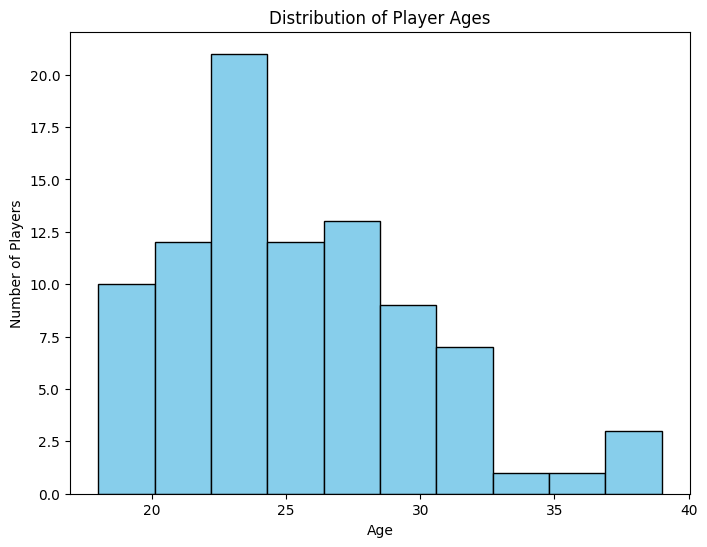

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.title('Distribution of Player Ages')
plt.show()

**From the above graph we can easily say that most players are between the age group of 20-25. Which is considered prime time of a player**

In [ ]:
df

,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,Best Position
0,ClÃ¡udio Ramos,Portugal,183,83,31,FC Porto,20,16,13,17,...,15,13,13,10,72,78,73,64,74,GK
1,Pedro Gomes,Portugal,185,75,20,Boavista FC,41,33,65,70,...,26,26,39,25,7,6,12,13,11,CB
2,JosuÃ©,Portugal,174,68,32,Legia Warszawa,77,74,55,53,...,77,73,72,69,16,15,10,15,10,CAM
3,TomÃ¡s AraÃºjo,Portugal,186,83,21,Gil Vicente,56,45,68,73,...,30,30,39,34,9,12,11,7,13,CB
5,JosÃ© SÃ¡,Portugal,192,84,30,Wolves,19,17,15,19,...,12,21,11,17,78,81,78,73,82,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Verdasca,Portugal,185,81,26,ÅlÄ sk WrocÅaw,60,49,60,62,...,37,34,47,30,5,13,7,14,7,CB
98,TrincÃ£o,Portugal,184,76,23,Sporting CP,81,83,34,36,...,83,56,67,66,15,5,9,6,7,CAM
99,Miguel Veloso,Portugal,180,79,37,Hellas Verona,83,72,66,67,...,83,79,73,70,8,16,7,9,15,CM
100,JoÃ£o QueirÃ³s,Portugal,190,81,25,GD Chaves,46,38,64,66,...,44,28,46,35,8,6,6,7,6,CB


In [ ]:
# Clean the player name column
def clean_player_name(name):
    if isinstance(name, str):  # Check if it is a string to avoid errors
        return ''.join(c for c in name if c.isalnum() or c.isspace()) # keep alphanumeric characters and space
    else:
        return name # return as is for non-string values

df['player'] = df['player'].apply(clean_player_name)
df

,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,Best Position
0,ClÃudio Ramos,Portugal,183,83,31,FC Porto,20,16,13,17,...,15,13,13,10,72,78,73,64,74,GK
1,Pedro Gomes,Portugal,185,75,20,Boavista FC,41,33,65,70,...,26,26,39,25,7,6,12,13,11,CB
2,JosuÃ,Portugal,174,68,32,Legia Warszawa,77,74,55,53,...,77,73,72,69,16,15,10,15,10,CAM
3,TomÃs AraÃºjo,Portugal,186,83,21,Gil Vicente,56,45,68,73,...,30,30,39,34,9,12,11,7,13,CB
5,JosÃ SÃ,Portugal,192,84,30,Wolves,19,17,15,19,...,12,21,11,17,78,81,78,73,82,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Verdasca,Portugal,185,81,26,ÅlÄ sk WrocÅaw,60,49,60,62,...,37,34,47,30,5,13,7,14,7,CB
98,TrincÃo,Portugal,184,76,23,Sporting CP,81,83,34,36,...,83,56,67,66,15,5,9,6,7,CAM
99,Miguel Veloso,Portugal,180,79,37,Hellas Verona,83,72,66,67,...,83,79,73,70,8,16,7,9,15,CM
100,JoÃo QueirÃ³s,Portugal,190,81,25,GD Chaves,46,38,64,66,...,44,28,46,35,8,6,6,7,6,CB


In [ ]:
filtered_df = df[(df['age'] >= 19) & (df['age'] <= 32)]
df = filtered_df.sort_values(by='age')

print("\nPlayers aged 19-34, sorted by age:")
df.reset_index(drop=True, inplace=True)
df


Players aged 19-34, sorted by age:


,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,Best Position
0,AntÃ³nio Silva,Portugal,187,80,19,SL Benfica,73,69,73,78,...,31,26,40,29,6,12,10,8,8,CB
1,Miguel FalÃ,Portugal,178,78,19,SC Braga,62,67,47,45,...,57,43,62,53,14,10,10,14,7,RM
2,GonÃalo Esteves,Portugal,171,73,19,Sporting CP,70,69,66,68,...,66,43,42,39,10,13,6,11,6,RB
3,Rodrigo Gomes,Portugal,175,69,20,SC Braga,71,72,51,49,...,56,41,56,45,14,10,13,10,10,CAM
4,AndrÃ SimÃµes,Portugal,174,64,20,Gil Vicente,64,62,49,50,...,43,40,48,39,6,11,6,9,12,CDM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,ClÃudio Ramos,Portugal,183,83,31,FC Porto,20,16,13,17,...,15,13,13,10,72,78,73,64,74,GK
79,NÃlson Oliveira,Portugal,185,82,32,PAOK FC,74,72,29,40,...,63,56,80,74,7,8,7,7,10,ST
80,Roderick Miranda,Portugal,191,85,32,Melb. Victory,58,51,70,69,...,42,32,20,43,6,12,14,8,12,CB
81,JosuÃ,Portugal,174,68,32,Legia Warszawa,77,74,55,53,...,77,73,72,69,16,15,10,15,10,CAM


**We filtered the data set to the most preffered age a player can play at his atmost best and provide for the team**

In [ ]:
bc = df.groupby('player')['ball_control'].mean().sort_values(ascending=False)
bc.head(10)

,ball_control
player,
JoÃo FÃlix,87.0
JoÃo Cancelo,86.0
Rafael LeÃo,86.0
Bruno Fernandes,84.0
TrincÃo,81.0
Renato Sanches,81.0
Nuno Santos,80.0
NÃlson Semedo,80.0
Daniel BraganÃa,80.0


**We can clearly see the top 10 players in the current squad who can keep the ball**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   player          83 non-null     object
 1   country         83 non-null     object
 2   height          83 non-null     int64 
 3   weight          83 non-null     int64 
 4   age             83 non-null     int64 
 5   club            83 non-null     object
 6   ball_control    83 non-null     int64 
 7   dribbling       83 non-null     int64 
 8   slide_tackle    83 non-null     int64 
 9   stand_tackle    83 non-null     int64 
 10  aggression      83 non-null     int64 
 11  reactions       83 non-null     int64 
 12  att_position    83 non-null     int64 
 13  interceptions   83 non-null     int64 
 14  vision          83 non-null     int64 
 15  composure       83 non-null     int64 
 16  crossing        83 non-null     int64 
 17  short_pass      83 non-null     int64 
 18  long_pass   

In [ ]:
df['player'] = df['player'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   player          83 non-null     object
 1   country         83 non-null     object
 2   height          83 non-null     int64 
 3   weight          83 non-null     int64 
 4   age             83 non-null     int64 
 5   club            83 non-null     object
 6   ball_control    83 non-null     int64 
 7   dribbling       83 non-null     int64 
 8   slide_tackle    83 non-null     int64 
 9   stand_tackle    83 non-null     int64 
 10  aggression      83 non-null     int64 
 11  reactions       83 non-null     int64 
 12  att_position    83 non-null     int64 
 13  interceptions   83 non-null     int64 
 14  vision          83 non-null     int64 
 15  composure       83 non-null     int64 
 16  crossing        83 non-null     int64 
 17  short_pass      83 non-null     int64 
 18  long_pass   

In [ ]:
gk_hand = df.groupby('player')['gk_handling'].mean().sort_values(ascending = False)
gk_hand.head(10)

,gk_handling
player,
JosÃ SÃ,78.0
Rui Silva,77.0
ClÃudio Ramos,73.0
AndrÃ Moreira,67.0
Joel Pereira,64.0
Celton Biai,59.0
Bernardo Vital,15.0
Tiago Dantas,15.0
Gedson Fernandes,15.0


In [ ]:
gk_hand.head(3)

,gk_handling
player,
JosÃ SÃ,78.0
Rui Silva,77.0
ClÃudio Ramos,73.0


In [ ]:
df['Best Position'].unique()

array(['CB', 'RM', 'RB', 'CAM', 'CDM', 'LWB', 'CM', 'LM', 'ST', 'RWB',
       'GK', 'LB', 'LW'], dtype=object)

In [ ]:
overall_dict = dict(zip(dt['Known As'], dt['Overall']))
df['overall'] = df['player'].map(overall_dict)
df

,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,Best Position,overall
0,AntÃ³nio Silva,Portugal,187,80,19,SL Benfica,73,69,73,78,...,26,40,29,6,12,10,8,8,CB,66.0
1,Miguel FalÃ,Portugal,178,78,19,SC Braga,62,67,47,45,...,43,62,53,14,10,10,14,7,RM,NaN
2,GonÃalo Esteves,Portugal,171,73,19,Sporting CP,70,69,66,68,...,43,42,39,10,13,6,11,6,RB,NaN
3,Rodrigo Gomes,Portugal,175,69,20,SC Braga,71,72,51,49,...,41,56,45,14,10,13,10,10,CAM,67.0
4,AndrÃ SimÃµes,Portugal,174,64,20,Gil Vicente,64,62,49,50,...,40,48,39,6,11,6,9,12,CDM,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,ClÃudio Ramos,Portugal,183,83,31,FC Porto,20,16,13,17,...,13,13,10,72,78,73,64,74,GK,NaN
79,NÃlson Oliveira,Portugal,185,82,32,PAOK FC,74,72,29,40,...,56,80,74,7,8,7,7,10,ST,NaN
80,Roderick Miranda,Portugal,191,85,32,Melb. Victory,58,51,70,69,...,32,20,43,6,12,14,8,12,CB,69.0
81,JosuÃ,Portugal,174,68,32,Legia Warszawa,77,74,55,53,...,73,72,69,16,15,10,15,10,CAM,NaN


In [ ]:
df = df.dropna(subset=['overall'])

In [ ]:
df.isna().sum()

,0
player,0
country,0
height,0
weight,0
age,0
club,0
ball_control,0
dribbling,0
slide_tackle,0
stand_tackle,0


**Currently the nan values and null values are corrected or dropped**

In [ ]:
speed = df.groupby('player')['acceleration'].mean().sort_values(ascending = False)
speed.head(10)

,acceleration
player,
Gelson Martins,91.0
Bruma,91.0
Renato Sanches,85.0
Nuno Santos,84.0
Nuno Tavares,83.0
Gedson Fernandes,80.0
Rodrigo Gomes,80.0
Heriberto Tavares,80.0
Tiago DjalÃ³,79.0


**We have noted the players with the most accelaration as it would be a key factor for the team preparation**

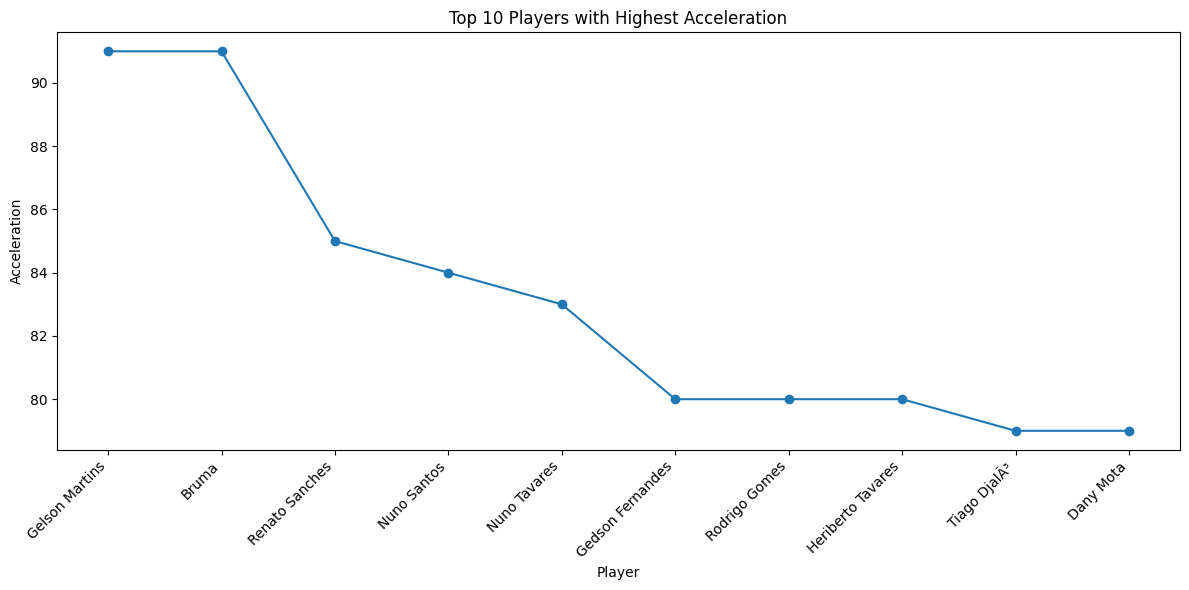

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(speed.head(10).index, speed.head(10).values, marker='o', linestyle='-')
plt.xlabel("Player")
plt.ylabel("Acceleration")
plt.title("Top 10 Players with Highest Acceleration")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**This helps us to understand which players can be used to take the game forward**

In [ ]:
df.columns.unique()

Index(['player', 'country', 'height', 'weight', 'age', 'club', 'ball_control',
       'dribbling', 'slide_tackle', 'stand_tackle', 'aggression', 'reactions',
       'att_position', 'interceptions', 'vision', 'composure', 'crossing',
       'short_pass', 'long_pass', 'acceleration', 'stamina', 'strength',
       'balance', 'sprint_speed', 'agility', 'jumping', 'heading',
       'shot_power', 'finishing', 'long_shots', 'curve', 'fk_acc', 'penalties',
       'volleys', 'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'Best Position', 'overall'],
      dtype='object')

In [ ]:
df.stamina.unique()

array([83, 70, 62, 64, 73, 68, 67, 52, 72, 58, 76, 69, 63, 27, 86, 65, 61,
       81, 75, 74, 71, 34, 84, 78, 93])

In [ ]:
stamina = df.groupby('player')['stamina'].mean().sort_values(ascending = False)
stamina.head(10)

,stamina
player,
Bruno Fernandes,93.0
Renato Sanches,86.0
Gedson Fernandes,86.0
Nuno Santos,84.0
Ricardo Santos,84.0
Gelson Martins,84.0
Diogo Dalot,83.0
Nuno Tavares,83.0
AntÃ³nio Silva,83.0


**These are the list of players who can play for the whole 90 minutes with comparitabily less fatigue**

In [ ]:
df['Best Position'].unique()

array(['CB', 'CAM', 'LWB', 'CM', 'RM', 'RWB', 'GK', 'LB', 'RB', 'LM',
       'CDM', 'ST', 'LW'], dtype=object)

In [ ]:
df.isna().sum()

,0
player,0
country,0
height,0
weight,0
age,0
club,0
ball_control,0
dribbling,0
slide_tackle,0
stand_tackle,0


In [ ]:
defense = df.loc[df['Best Position'].isin(['CB', 'RWB', 'RB', 'LB', 'LWB'])]

In [ ]:
defense

,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,Best Position,overall
0,AntÃ³nio Silva,Portugal,187,80,19,SL Benfica,73,69,73,78,...,26,40,29,6,12,10,8,8,CB,66.0
7,Nazinho,Portugal,179,75,20,Sporting CP,59,56,65,67,...,37,44,29,6,6,5,14,6,LWB,66.0
8,Pedro Gomes,Portugal,185,75,20,Boavista FC,41,33,65,70,...,26,39,25,7,6,12,13,11,CB,60.0
10,Edu Borges,Portugal,188,79,21,GD Chaves,40,32,66,65,...,35,38,33,10,13,9,8,13,CB,60.0
14,Bernardo Vital,Portugal,187,80,22,Estoril Praia,51,38,73,76,...,29,42,30,13,9,15,7,10,CB,69.0
20,Fabinho,Portugal,169,63,22,STVV,60,62,61,63,...,45,34,24,9,12,14,13,5,RWB,62.0
25,Filipe Relvas,Portugal,192,84,23,Portimonense SC,64,55,68,70,...,53,43,39,9,12,15,5,9,CB,69.0
27,Nuno Tavares,Portugal,183,75,23,OM,74,74,73,76,...,55,42,44,12,8,13,6,13,LWB,74.0
29,Miguel NÃ³brega,Portugal,189,83,23,Rio Ave FC,40,25,65,72,...,28,42,33,6,13,13,15,12,CB,62.0
32,Tiago DjalÃ³,Portugal,190,82,23,LOSC Lille,67,62,75,78,...,32,47,35,7,9,9,9,6,CB,75.0


In [ ]:
df['overall'] = df['overall'].astype(int)

<ipython-input-387-1b1a851ff9a8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.overall.unique()

array([66, 67, 60, 64, 69, 62, 70, 74, 75, 61, 77, 71, 76, 78, 63, 65, 80,
       86, 73])

**These are the available top 10 players suitable for defending positions**

In [ ]:
df.att_position.unique()

array([25, 67, 51, 27, 65, 44, 61, 52, 32, 66, 46, 72, 76, 64, 22,  6, 49,
       70, 58, 77, 53, 74, 62, 31, 60, 54, 14, 39, 81, 85, 71, 56, 20, 45,
       41])

In [ ]:
fk = df.groupby('player')['fk_acc'].mean().sort_values(ascending = False)
fk.head(10)

,fk_acc
player,
Bruno Fernandes,85.0
Gedson Fernandes,76.0
Nuno Santos,72.0
Chiquinho,71.0
Heriberto Tavares,70.0
Bruma,70.0
Renato Sanches,68.0
Paulo Henrique,66.0
Ivo Rodrigues,64.0


In [ ]:
fig = px.line(fk.head(10), x=fk.head(10).index, y=fk.head(10).values,
              labels={'x': 'Player', 'y': 'Freekick Accuracy'},
              title='Top 10 Players with Highest Freekick Accuracy')
fig.update_xaxes(tickangle=45)
fig.show()

**It would be wise to include a player with high freekick accuracy to make advantage of set pieces**

In [ ]:
df.columns.unique()

Index(['player', 'country', 'height', 'weight', 'age', 'club', 'ball_control',
       'dribbling', 'slide_tackle', 'stand_tackle', 'aggression', 'reactions',
       'att_position', 'interceptions', 'vision', 'composure', 'crossing',
       'short_pass', 'long_pass', 'acceleration', 'stamina', 'strength',
       'balance', 'sprint_speed', 'agility', 'jumping', 'heading',
       'shot_power', 'finishing', 'long_shots', 'curve', 'fk_acc', 'penalties',
       'volleys', 'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'Best Position', 'overall'],
      dtype='object')

In [ ]:
df.dtypes

,0
player,object
country,object
height,int64
weight,int64
age,int64
club,object
ball_control,int64
dribbling,int64
slide_tackle,int64
stand_tackle,int64


In [ ]:
df.columns.unique()

Index(['player', 'country', 'height', 'weight', 'age', 'club', 'ball_control',
       'dribbling', 'slide_tackle', 'stand_tackle', 'aggression', 'reactions',
       'att_position', 'interceptions', 'vision', 'composure', 'crossing',
       'short_pass', 'long_pass', 'acceleration', 'stamina', 'strength',
       'balance', 'sprint_speed', 'agility', 'jumping', 'heading',
       'shot_power', 'finishing', 'long_shots', 'curve', 'fk_acc', 'penalties',
       'volleys', 'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'Best Position', 'overall'],
      dtype='object')

In [ ]:
df = df.drop(['club', 'sprint_speed'], axis = 1)

In [ ]:
df

,player,country,height,weight,age,ball_control,dribbling,slide_tackle,stand_tackle,aggression,...,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,Best Position,overall
0,AntÃ³nio Silva,Portugal,187,80,19,73,69,73,78,63,...,26,40,29,6,12,10,8,8,CB,66
3,Rodrigo Gomes,Portugal,175,69,20,71,72,51,49,52,...,41,56,45,14,10,13,10,10,CAM,67
7,Nazinho,Portugal,179,75,20,59,56,65,67,58,...,37,44,29,6,6,5,14,6,LWB,66
8,Pedro Gomes,Portugal,185,75,20,41,33,65,70,46,...,26,39,25,7,6,12,13,11,CB,60
9,Paulo Bernardo,Portugal,180,75,21,73,72,44,62,64,...,52,57,63,10,11,5,9,5,CAM,67
10,Edu Borges,Portugal,188,79,21,40,32,66,65,48,...,35,38,33,10,13,9,8,13,CB,60
11,Rodrigo Andrade,Portugal,180,74,21,69,66,55,62,59,...,47,48,41,8,7,12,6,12,CM,64
13,Jota Pereira,Portugal,177,83,21,65,64,27,33,37,...,41,52,53,14,14,8,11,10,RM,60
14,Bernardo Vital,Portugal,187,80,22,51,38,73,76,67,...,29,42,30,13,9,15,7,10,CB,69
15,Tiago Dantas,Portugal,169,58,22,74,72,46,47,44,...,62,64,53,8,9,15,6,6,CAM,67


In [ ]:
df.columns.unique()

Index(['player', 'country', 'height', 'weight', 'age', 'ball_control',
       'dribbling', 'slide_tackle', 'stand_tackle', 'aggression', 'reactions',
       'att_position', 'interceptions', 'vision', 'composure', 'crossing',
       'short_pass', 'long_pass', 'acceleration', 'stamina', 'strength',
       'balance', 'agility', 'jumping', 'heading', 'shot_power', 'finishing',
       'long_shots', 'curve', 'fk_acc', 'penalties', 'volleys',
       'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'Best Position', 'overall'],
      dtype='object')

In [ ]:
gk_df = df.groupby(['player', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes'])['gk_positioning'].mean().sort_values(ascending = False)
gk_df.head(10).reset_index()

,player,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_positioning
0,Rui Silva,80,77,77,83,81.0
1,Joel Pereira,66,64,65,67,64.0
2,Celton Biai,63,59,60,67,59.0
3,Jota Pereira,14,8,11,10,14.0
4,Afonso Sousa,5,14,14,7,14.0
5,Rodrigo Gomes,10,13,10,10,14.0
6,David Carmo,10,7,9,15,14.0
7,Bernardo Vital,9,15,7,10,13.0
8,Renato Sanches,5,12,6,14,13.0
9,Bruma,11,13,8,8,12.0


**Players suitable for Goal Keeper position are filtered out. As a team consist of only two Goal Keepers. We have two players 'Rui Silva' and 'Anthony Lopes. And we have 'Josa Sa' as third goalkeeper**

In [ ]:
fig = px.scatter(gk_df.head(5).reset_index(), x="player", y="gk_positioning",
                 color="gk_reflexes", size="gk_handling", hover_data=['gk_kicking', 'gk_reflexes'])
fig.show()

In [ ]:
df.columns.unique()

Index(['player', 'country', 'height', 'weight', 'age', 'ball_control',
       'dribbling', 'slide_tackle', 'stand_tackle', 'aggression', 'reactions',
       'att_position', 'interceptions', 'vision', 'composure', 'crossing',
       'short_pass', 'long_pass', 'acceleration', 'stamina', 'strength',
       'balance', 'agility', 'jumping', 'heading', 'shot_power', 'finishing',
       'long_shots', 'curve', 'fk_acc', 'penalties', 'volleys',
       'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'Best Position', 'overall'],
      dtype='object')

In [ ]:
def_df = df.groupby(['player','age', 'composure', 'strength', 'slide_tackle', 'stand_tackle', 'aggression', 'reactions'])['interceptions'].mean().sort_values(ascending = False)
def_df.head(10).reset_index()

,player,age,composure,strength,slide_tackle,stand_tackle,aggression,reactions,interceptions
0,AntÃ³nio Silva,19,77,82,73,78,63,78,80.0
1,David Carmo,24,70,92,76,79,80,76,78.0
2,Filipe Relvas,23,70,79,68,70,67,79,76.0
3,Diogo Dalot,24,78,76,77,77,81,79,76.0
4,Gedson Fernandes,24,79,71,72,77,78,79,75.0
5,Renato Sanches,26,83,83,65,74,84,80,75.0
6,Tiago DjalÃ³,23,69,84,75,78,74,73,75.0
7,Pedro Mendes,32,69,77,70,73,85,68,74.0
8,RÃºben Vezo,29,70,78,73,74,75,70,73.0
9,Bernardo Vital,22,57,74,73,76,67,72,71.0


**In most competitive matches 5 substitute players are allowed in whole. Taking into consideration of the whole team we tend to select 8 players for defending positions. The top 8 are the ones considered according to the statistics.**

In [ ]:
fig = px.histogram(def_df.head(10).reset_index(), x="player", y="interceptions",
                   title="Top 10 Defenders by Interceptions",
                   labels={"player": "Player", "interceptions": "Average Interceptions"},
                   color="age",
                   hover_data=['composure', 'strength'])
fig.show()

In [ ]:
df.columns.unique()

Index(['player', 'country', 'height', 'weight', 'age', 'ball_control',
       'dribbling', 'slide_tackle', 'stand_tackle', 'aggression', 'reactions',
       'att_position', 'interceptions', 'vision', 'composure', 'crossing',
       'short_pass', 'long_pass', 'acceleration', 'stamina', 'strength',
       'balance', 'agility', 'jumping', 'heading', 'shot_power', 'finishing',
       'long_shots', 'curve', 'fk_acc', 'penalties', 'volleys',
       'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'Best Position', 'overall'],
      dtype='object')

In [ ]:
att_df = df.groupby(['player','age', 'ball_control', 'dribbling', 'long_shots', 'curve', 'shot_power', 'heading', 'volleys', 'acceleration', 'stamina','height', 'finishing'])['att_position'].mean().sort_values(ascending = False)
att_df.head(10).reset_index()

,player,age,ball_control,dribbling,long_shots,curve,shot_power,heading,volleys,acceleration,stamina,height,finishing,att_position
0,Bruno Fernandes,28,84,79,88,86,88,64,87,75,93,179,83,85.0
1,Nuno Santos,28,80,81,81,79,86,59,84,84,84,177,77,81.0
2,Diogo Dalot,24,78,81,68,80,79,74,44,79,83,184,52,77.0
3,Nuno Tavares,23,74,74,69,73,80,58,44,83,83,183,54,76.0
4,Gedson Fernandes,24,78,82,76,80,80,61,64,80,86,181,72,76.0
5,Renato Sanches,26,81,82,78,69,89,61,68,85,86,176,66,74.0
6,Dany Mota,25,79,77,68,68,72,72,72,79,75,180,76,74.0
7,Chiquinho,28,75,74,72,78,76,36,71,75,78,175,66,72.0
8,Afonso Sousa,23,75,75,59,69,75,47,54,77,69,174,58,72.0
9,Ivo Rodrigues,28,75,76,73,75,76,48,66,78,63,180,66,71.0


**For attacking positions, finishing, shot power and ball control is mainly focused. The first 5 is considered for attacking positions.**

In [ ]:
fig = px.scatter(att_df.head(10).reset_index(), x="player", y="finishing",
                 size="shot_power", color="att_position", hover_data=['ball_control'])
fig.show()

In [ ]:
df.columns.unique()

Index(['player', 'country', 'height', 'weight', 'age', 'ball_control',
       'dribbling', 'slide_tackle', 'stand_tackle', 'aggression', 'reactions',
       'att_position', 'interceptions', 'vision', 'composure', 'crossing',
       'short_pass', 'long_pass', 'acceleration', 'stamina', 'strength',
       'balance', 'agility', 'jumping', 'heading', 'shot_power', 'finishing',
       'long_shots', 'curve', 'fk_acc', 'penalties', 'volleys',
       'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'Best Position', 'overall'],
      dtype='object')

In [ ]:
mid_df = df.groupby(['player','age', 'ball_control', 'dribbling', 'crossing', 'balance', 'short_pass', 'fk_acc', 'acceleration', 'stamina','volleys'])['vision'].mean().sort_values(ascending = False)
mid_df.head(10).reset_index()

,player,age,ball_control,dribbling,crossing,balance,short_pass,fk_acc,acceleration,stamina,volleys,vision
0,Bruno Fernandes,28,84,79,86,79,89,85,75,93,87,90.0
1,Renato Sanches,26,81,82,72,90,81,68,85,86,68,79.0
2,Gedson Fernandes,24,78,82,73,72,78,76,80,86,64,78.0
3,Diogo Dalot,24,78,81,78,71,80,52,79,83,44,78.0
4,Nuno Santos,28,80,81,79,72,76,72,84,84,84,76.0
5,Ivo Rodrigues,28,75,76,73,70,67,64,78,63,66,75.0
6,Chiquinho,28,75,74,75,80,77,71,75,78,71,73.0
7,Gelson Martins,28,77,81,70,84,72,60,91,84,74,72.0
8,Afonso Sousa,23,75,75,59,80,71,42,77,69,54,72.0
9,Tiago Dantas,22,74,72,66,93,74,62,74,72,53,72.0


**For midfield we need players with vision. we need a total of 7 players inclusing substitues.**

In [ ]:
fig = px.scatter(df, x='age', y='overall', color='Best Position',
                 title='Age vs Overall Representation of Players',
                 labels={'age': 'Age', 'overall': 'Overall', 'Best Position': 'Best Position'})
fig.show()

In [410]:
df.columns.unique()

Index(['player', 'country', 'height', 'weight', 'age', 'ball_control',
       'dribbling', 'slide_tackle', 'stand_tackle', 'aggression', 'reactions',
       'att_position', 'interceptions', 'vision', 'composure', 'crossing',
       'short_pass', 'long_pass', 'acceleration', 'stamina', 'strength',
       'balance', 'agility', 'jumping', 'heading', 'shot_power', 'finishing',
       'long_shots', 'curve', 'fk_acc', 'penalties', 'volleys',
       'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'Best Position', 'overall'],
      dtype='object')